In [2]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import r2_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, mean_absolute_error
from sklearn.preprocessing import label_binarize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("spectral_res.csv")
df.loc[df["sweep"] == "neut", "s_val"] = 0.0

df.head()

,rep,sweep,s_val,estimated_sval,max_likelihood
0,0,neut,0.0,0.000,4.426489e-05
1,1,neut,0.0,0.000,1.130203e-15
2,10,neut,0.0,0.000,2.616802e-06
3,100,neut,0.0,0.000,2.634219e-06
4,1001,neut,0.0,0.005,9.129118e-08


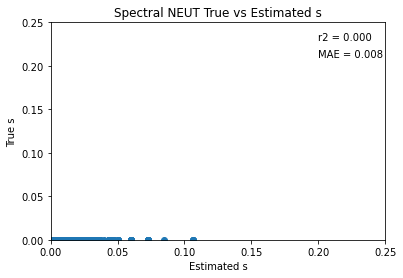

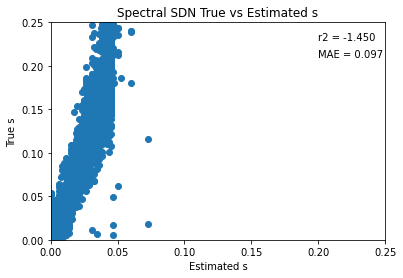

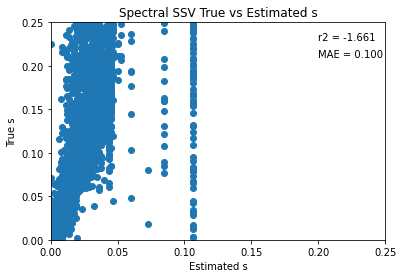

<Figure size 432x288 with 0 Axes>

In [4]:
for swp in df["sweep"].unique():
    subdf = df[df["sweep"] == swp].dropna()

    plt.scatter(x=subdf[f"estimated_sval"], y=subdf["s_val"])
        
    plt.xlim(0, .25)
    plt.ylim(0, .25)
    plt.annotate("r2 = {:.3f}".format(r2_score(subdf["s_val"], subdf[f"estimated_sval"])), (0.20, 0.23))
    plt.annotate("MAE = {:.3f}".format(mean_absolute_error(subdf["s_val"], subdf[f"estimated_sval"])), (0.20, 0.21))
    plt.title(f"Spectral {swp.upper()} True vs Estimated s") 
    plt.xlabel("Estimated s") 
    plt.ylabel("True s") 
    plt.savefig(f"{swp}_true_v_est_ts.pdf")
    plt.show()
    plt.clf()